In [154]:
# this is based on polarity (how positive or negative a word is) -1 = very negative : +1 very positive
# and subjectivity (how opinionated a word is) 0 = fact : 1 opinion
file_names = ["speaker1 _a.txt", "speaker1_b.txt", 
             "speaker1_c.txt", "speaker1_d.txt", "speaker2_a.txt", "speaker2_b.txt", 
             "speaker2_c.txt", "speaker2_d.txt"]
# read in the corpus data
import pandas as pd
data = pd.read_pickle('data_clean.pkl')
data["file_names"] = file_names
data

,transcripts,file_names
speaker1 _a.txt,this has been sort of the if youre going to ...,speaker1 _a.txt
speaker1_b.txt,netflix no not at all netflix is pretty the...,speaker1_b.txt
speaker1_c.txt,good afternoon and welcome to the netflix qu...,speaker1_c.txt
speaker1_d.txt,we had a big stock surged quickly fizzling w...,speaker1_d.txt
speaker2_a.txt,today oh i think theyre going to crush the nu...,speaker2_a.txt
speaker2_b.txt,really seems like the shares were trading off...,speaker2_b.txt
speaker2_c.txt,,speaker2_c.txt
speaker2_d.txt,decline in membership growth to decelerate as...,speaker2_d.txt


In [155]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data['polarity'] = data['transcripts'].apply(pol)
data['subjectivity'] = data['transcripts'].apply(sub)
data

,transcripts,file_names,polarity,subjectivity
speaker1 _a.txt,this has been sort of the if youre going to ...,speaker1 _a.txt,0.103929,0.494246
speaker1_b.txt,netflix no not at all netflix is pretty the...,speaker1_b.txt,0.162166,0.549192
speaker1_c.txt,good afternoon and welcome to the netflix qu...,speaker1_c.txt,0.209901,0.493392
speaker1_d.txt,we had a big stock surged quickly fizzling w...,speaker1_d.txt,0.115708,0.356492
speaker2_a.txt,today oh i think theyre going to crush the nu...,speaker2_a.txt,0.124051,0.456235
speaker2_b.txt,really seems like the shares were trading off...,speaker2_b.txt,0.107481,0.351463
speaker2_c.txt,,speaker2_c.txt,0.000000,0.000000
speaker2_d.txt,decline in membership growth to decelerate as...,speaker2_d.txt,0.045098,0.258824


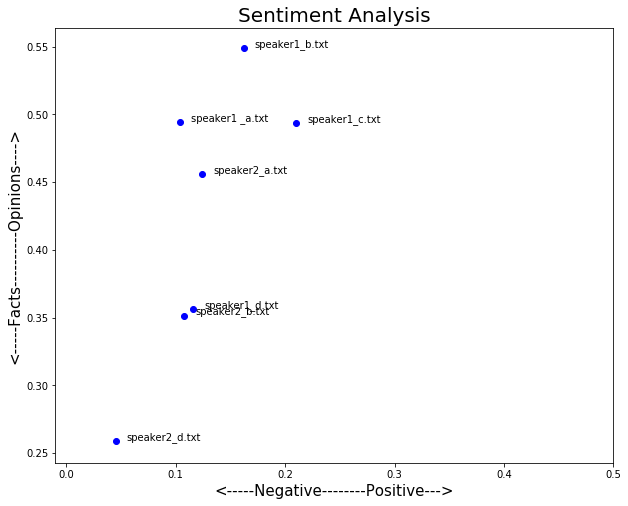

In [156]:
# plot the results
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
for index, voice in enumerate(data.index):
    
    
    x = data.polarity.loc[voice]
    y = data.subjectivity.loc[voice]
    plt.scatter(x, y, color = 'blue')
    plt.text(x+.01, y+.001, data['file_names'][index], fontsize=10)
    plt.xlim(-.01, .5)
    
plt.title("Sentiment Analysis", fontsize=20)
plt.xlabel("<-----Negative--------Positive--->", fontsize=15)
plt.ylabel("<-----Facts----------Opinions---->", fontsize=15)
plt.show()

In [157]:
# We can also check sentiment over time


# split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    # take a string of text anf split them into 10 eqwual parts
    
    # calculate length of text, size of each chunck of text and the starting points of each piece
    length = len(text)
    size = math.floor(length/n)
    start = np.arange(0, length, size)
    
    # obtain equal sized pieces of text and throw into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [218]:
data


# create a list to hold all the pieves of text
list_pieces = []
index = 0
aCount = 0
for t in data["transcripts"]:
    
    try:
        index += 1
        split = split_text(t)
        list_pieces.append(split)
        aCount += 1
    
    except ZeroDivisionError as e:
        print("c.txt had only one speaker")
        continue
    
    
    

    
ZeroDivisionError

print(aCount)


c.txt had only one speaker
7


In [219]:
# calculate polairty for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)



    
    

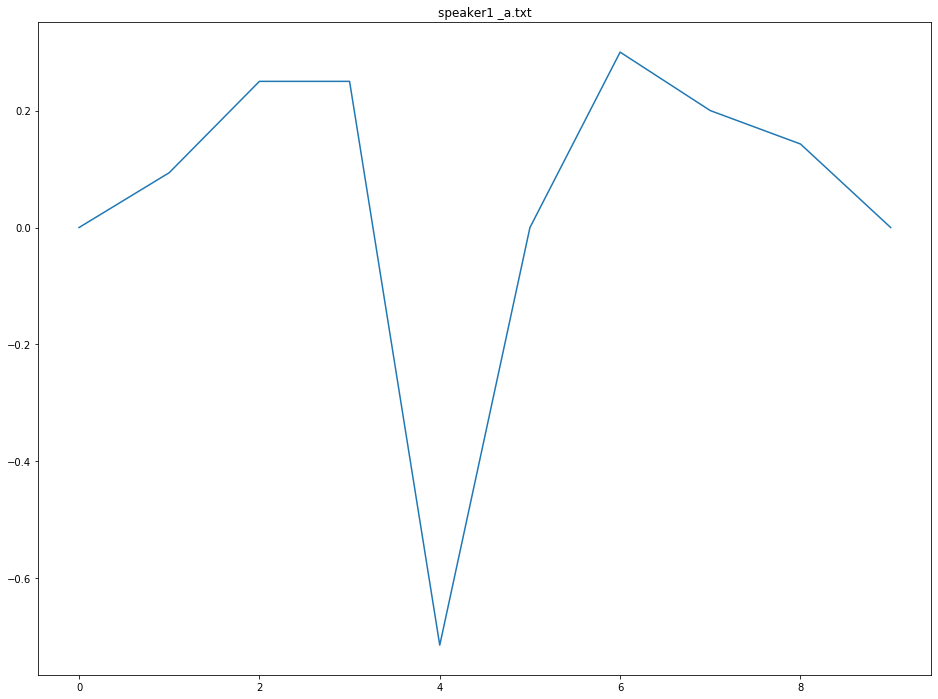

None


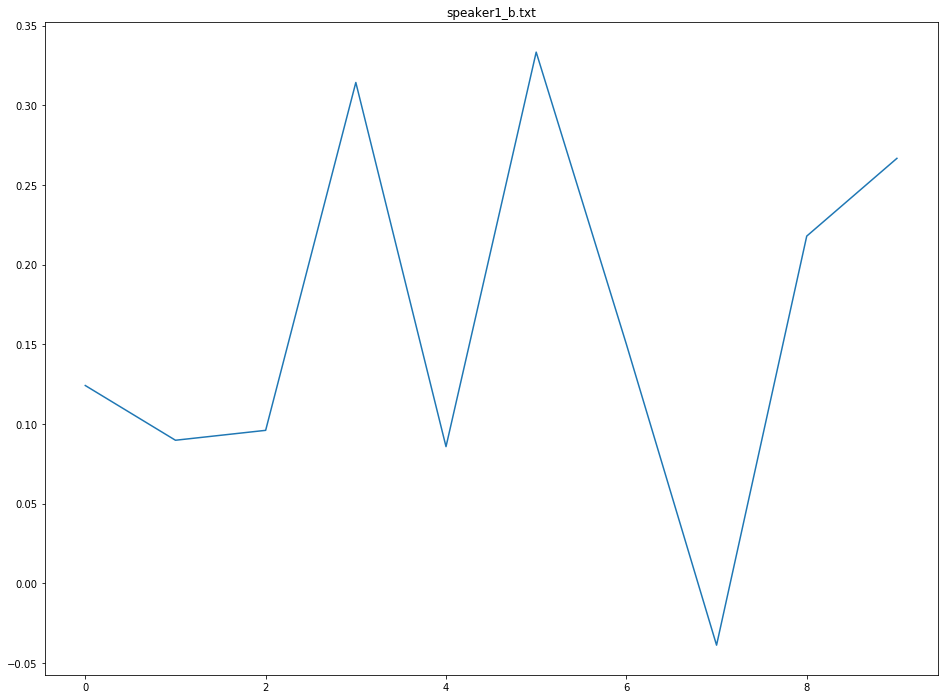

None


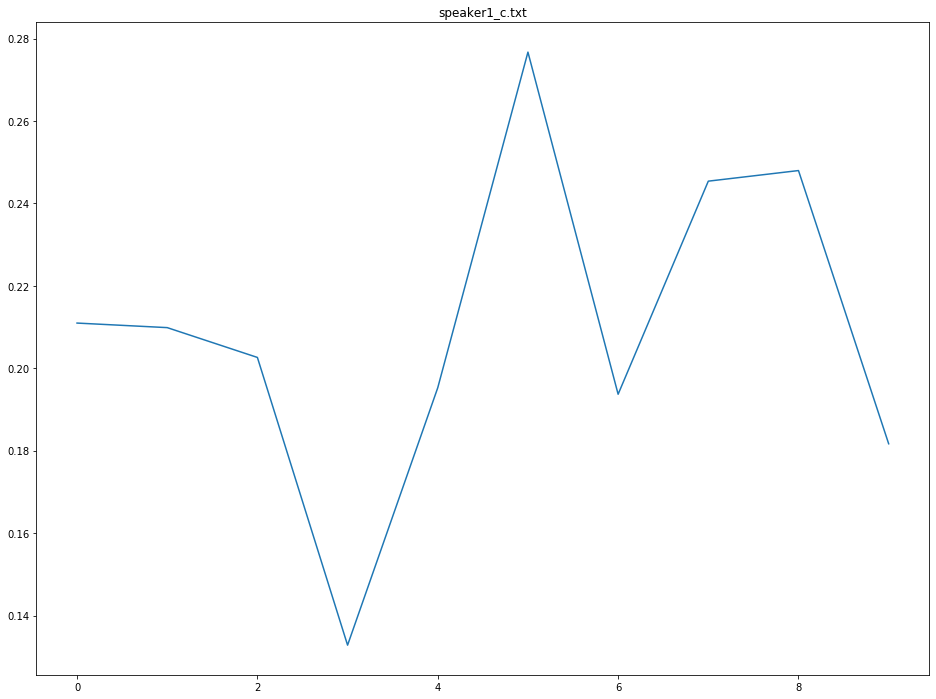

None


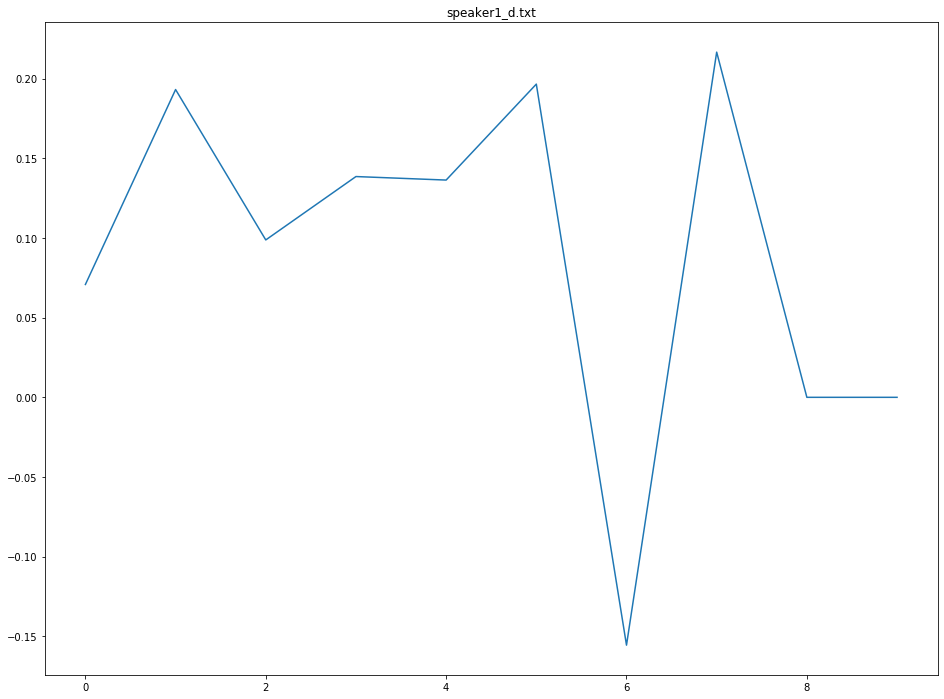

None


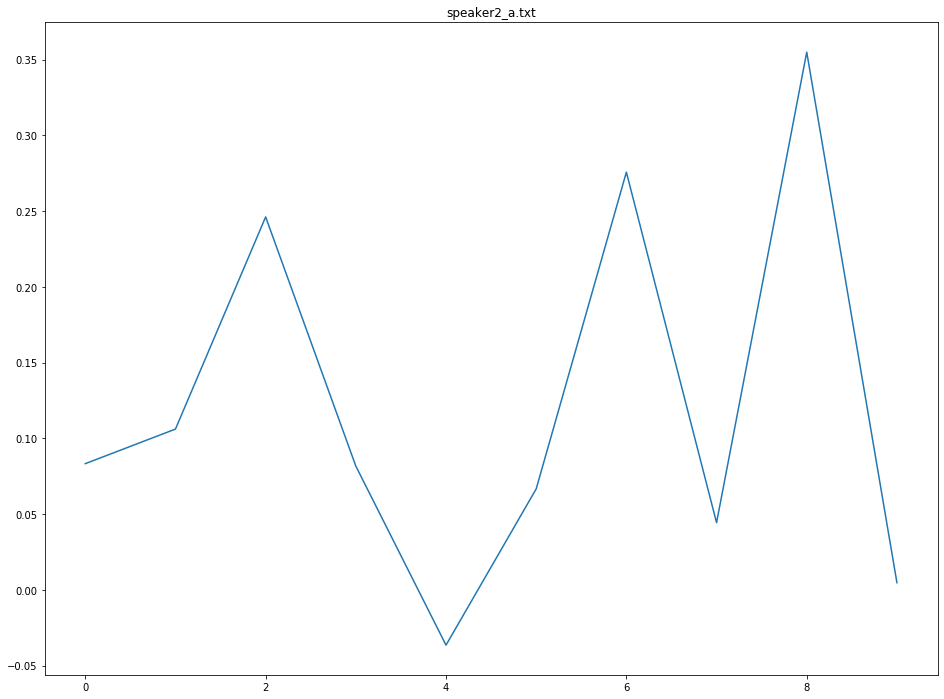

None


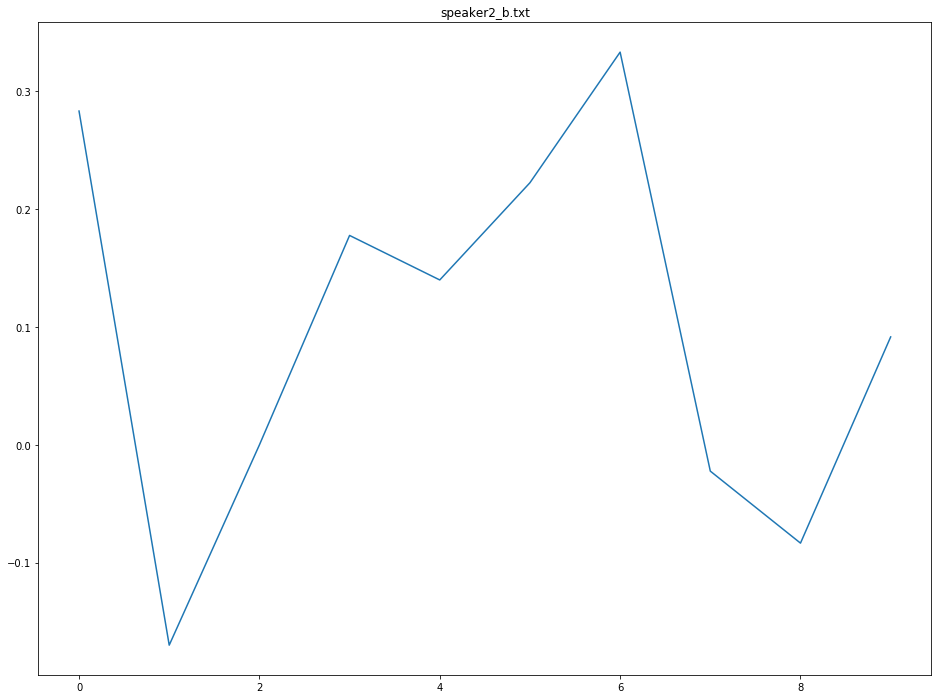

None


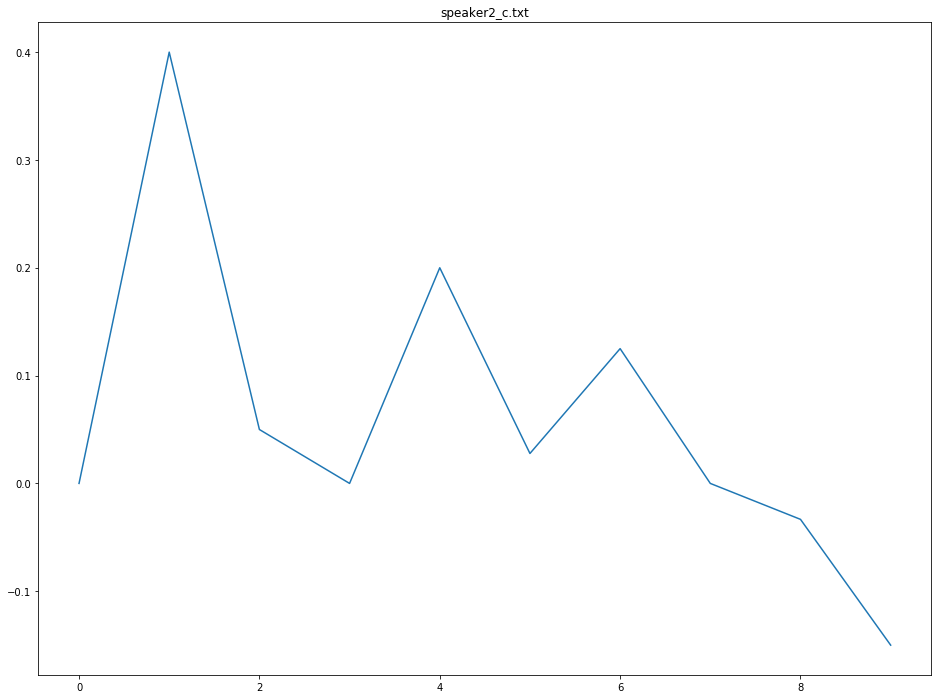

None
c.txt only have one speaker
The last script is actually speaker2_d.txt/ could modify


In [224]:
aCount = 0
for i in data["file_names"]:
    
    try:
        plt.plot(polarity_transcript[aCount])
        plt.title(data['file_names'].index[aCount])
    
    
    except IndexError as e:
        print("c.txt only have one speaker")
        print("The last script is actually speaker2_d.txt/ could modify")
        continue
    print(plt.show())
    aCount+=1

7